# Basis Functions

### by Neil Lawrence (2015)

We've seen how we may perform linear regression. Now, we are going to consider how we can perform *non-linear* regression. However, before we get into the details of how to do that we first need to consider in what ways the regression can be non-linear. 

Multivariate linear regression allows us to build models that take many features into account when making our prediction. In this session we are going to introduce *basis functions*. The term seems complicated, but they are actually based on rather a simple idea. If we are doing a multivariate linear regression, we get extra features that *might* help us predict our required response varible (or target value), $y$. But what if we only have one input value? We can actually artificially generate more input values with basis functions.

## Non-linear in the Inputs

When we refer to non-linear regression, we are normally referring to whether the regression is non-linear in the input space, or non-linear in the *covariates*. The covariates are the observations that move with the target (or *response*) variable. In our notation we have been using $\mathbf{x}_i$ to represent a vector of the covariates associated with the $i$th observation. The coresponding response variable is $y_i$. If a model is non-linear in the inputs, it means that there is a non-linear function between the inputs and the response variable. Linear functions are functions that only involve multiplication and addition, in other words they can be represented through *linear algebra*. Linear regression involves assuming that a function takes the form
$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}
$$
where $\mathbf{w}$ are our regression weights. A very easy way to make the linear regression non-linear is to introduce non-linear functions. When we are introducing non-linear regression these functions are known as *basis functions*.

### Basis Functions

Here's the idea, instead of working directly on the original input space, $\mathbf{x}$, we build models in a new space, $\boldsymbol{\phi}(\mathbf{x})$ where $\boldsymbol{\phi}(\cdot)$ is a *vector valued* function that is defined on the space $\mathbf{x}$. 

Remember, that a vector valued function is just a vector that contains functions instead of values. Here's an example for a one dimensional input space, $x$, being projected to a *quadratic* basis. First we consider each basis function in turn, we can think of the elements of our vector as being indexed so that we have
\begin{align*}
\phi_1(x) = 1, \\
\phi_2(x) = x, \\
\phi_3(x) = x^2.
\end{align*}
Now we can consider them together by placing them in a vector,
$$
\boldsymbol{\phi}(x) = \begin{bmatrix} 1\\ x \\ x^2\end{bmatrix}.
$$
This is the idea of the vector valued function, we have simply collected the different functions together in the same vector making them notationally easier to deal with in our mathematics. 

When we consider the vector valued function for each data point, then we place all the data into a matrix. The result is a matrix valued function,
$$
\boldsymbol{\Phi}(\mathbf{x}) = 
\begin{bmatrix} 1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
$$
where we are still in the one dimensional input setting so $\mathbf{x}$ here represents a vector of our inputs with $n$ elements. 

Let's try constructing such a matrix for a set of inputs. First of all, we create a function that returns the matrix valued function

In [74]:
import numpy as np # import numpy for the arrays.

def quadratic(x):
    """Take in a vector of input values and return the design matrix associated 
    with the basis functions."""
    return np.hstack([np.ones((n, 1)), x, x**2])

This function takes in an $n\times 1$ dimensional vector and returns an $n\times 3$ dimensional *design matrix* containing the basis functions. We can plot those basis functions against their input as follows.

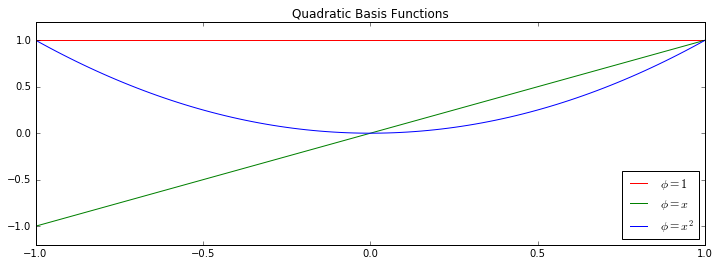

In [75]:
# ensure plots appear in the notebook.
%matplotlib inline 
import pylab as plt

# first let's generate some inputs
n = 100
x = np.zeros((n, 1))  # create a data set of zeros
x[:, 0] = np.linspace(-1, 1, n) # fill it with values between -1 and 1

Phi = quadratic(x)

fig, ax = plt.subplots(figsize=(12,4))
ax.set_ylim([-1.2, 1.2]) # set y limits to ensure basis functions show.
ax.plot(x[:,0], Phi[:, 0], 'r-', label = '$\phi=1$')
ax.plot(x[:,0], Phi[:, 1], 'g-', label = '$\phi = x$')
ax.plot(x[:,0], Phi[:, 2], 'b-', label = '$\phi = x^2$')
ax.legend(loc='lower right')
ax.set_title('Quadratic Basis Functions')

The actual function we observe is then made up of a sum of these functions. This is the reason for the name basis. The term *basis* means 'the underlying support or foundation for an idea, argument, or process', and in this context they form the underlying support for our prediction function. Our prediction function can only be composed of a weighted linear sum of our basis functions. 

### Different Basis

Our choice of basis can be made based on what our beliefs about what is appropriate for the data. For example, the polynomial basis extends the quadratic basis to aribrary degree, so we might define the $j$th basis function associated with the model as
$$
\phi_j(x_i) = x_i^j
$$
which can be implemented as a function in code as follows

In [76]:
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

To aid in understanding how a basis works, we've provided you with a small interactive tool for exploring this polynomial basis. The tool can be summoned with the following command.

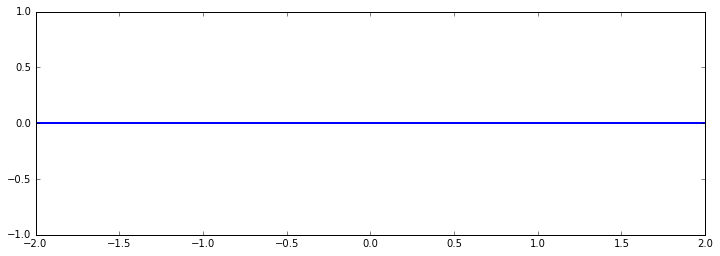

In [77]:
import pods
pods.notebook.display_prediction(basis=polynomial, num_basis=10)


Try moving the sliders around to change the weight of each basis function. Click the control box `display_basis` to show the underlying basis functions (in red). The prediction function is shown in a thick blue line. *Warning* the sliders aren't presented quite in the correct order. `w_0` is associated with the bias, `w_1` is the linear term, `w_2` the quadratic and here (because we have four basis functions) we have `w_3` for the *cubic* term. So the subscript of the weight parameter is always associated with the corresponding polynomial's degree.

### Assignment Question 1

Try increasing the number of basis functions (thereby increasing the *degree* of the resulting polynomial). Describe what you see as you increase number of basis up to 10. Is it easy to change the function in intiutive ways?

*5 marks*

#### Question 1 Answer

Write your answer to the question in this box.

As the number of basis is increased it is observed that the prediction line can be manipulated easier. It can be moved into more directions with more accuracy. It can follow linear curve paths, and any degree polynomial curve paths. The line can follow a linear path, then a cubic path, then a quadradic, then a linear again and so on. And as the number of basis increases this manipulation of the line becomes easier. This means that the prediction line will be able to follow any sort of training data points plotted, much more accurately. So, as the number of basis increases, the prediction line's accurary to follow the training data plotted, is increased. In other words, as the number increases the prediction line will get closer to the observed data, because it will be able to follow them in any direction plotted.

No it is not easy to change the function in intiutive ways because you have to visualise the result. You have to check each polynomial degree to see how well the prediction line follows the training data. On the other hand, is not only about how well it follows the training data, but also how well it will follow the testing data. This is done so you avoid overfitting. A higher order polynomial (more basis) will follow the observed (training) data more accurately, but how well will it follow testing data? As the number of basis increases the training loss decreases, but the validation loss increases. This means that if the prediction is over-fitted with training data, it will follow that data very accurately, but it will have a hard time predicting the result for new data (testing data). In some cases, even just a linear basis function will provide better results than a 2nd, 3rd..8th polynomial. This is because higher order polynomials follow so well the training data, that cant provide a good prediction for new testing data. Therefore, it is not easy to change the function in intiutive ways. You must observe and analyse each basis function you add, and decide if the prediction will be better or worse when adding extra basis functions. 

## Radial Basis Functions

Another type of basis is sometimes known as a 'radial basis' because the effect basis functions are constructed on 'centres' and the effect of each basis function decreases as the radial distance from each centre increases. 

In [78]:
# %load -s radial mlai.py
def radial(x, num_basis=4, data_limits=[-1., 1.]):
    "Radial basis constructed using exponentiated quadratic form."
    if num_basis>1:
        centres=np.linspace(data_limits[0], data_limits[1], num_basis)
        width = (centres[1]-centres[0])/2.
    else:
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-0.5*((x-centres[i])/width)**2)
    return Phi

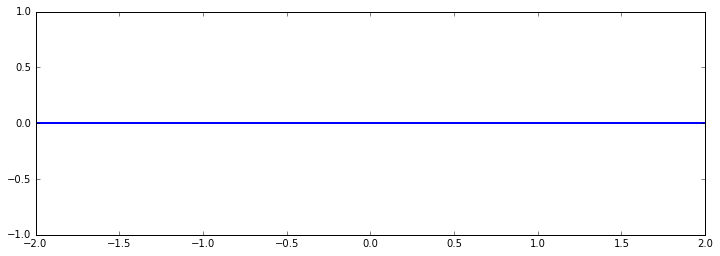

In [79]:
pods.notebook.display_prediction(basis=radial, num_basis=4)

## Fourier Basis

Fourier noticed that any *stationary* function could be converted to a sum of sines and cosines. A Fourier basis is a linear weighted sum of these functions.

In [80]:
# %load -s fourier mlai.py
def fourier(x, num_basis=4, data_limits=[-1., 1.]):
    "Fourier basis"
    tau = 2*np.pi
    span = float(data_limits[1]-data_limits[0])
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        count = float((i+1)//2)
        frequency = count/span
        if i % 2:
            Phi[:, i:i+1] = np.sin(tau*frequency*x)
        else:
            Phi[:, i:i+1] = np.cos(tau*frequency*x)
    return Phi

In this code, basis functions with an *odd* index are sine and basis functions with an *even* index are cosine. The first basis function (index 0, so cosine) has a frequency of 0 and then frequencies increase to 1, 2, 3, 4 etc every time a sine and cosine are included.

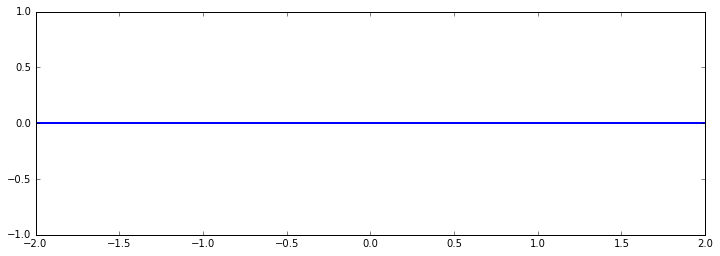

In [81]:
pods.notebook.display_prediction(basis=fourier, num_basis=4)

## Fitting to Data

Now we are going to consider how these basis functions can be adjusted to fit to a particular data set. We will return to the olympic marathon data from last time. First we will scale the output of the data to be zero mean and variance 1.

In [82]:
data = pods.datasets.olympic_marathon_men()
y = data['Y']
x = data['X']
y -= y.mean()
y /= y.std()

### Assignment Question 2

Now we are going to redefine our polynomial basis. Have a careful look at the operations we perform on `x` to create `z`. We use `z` in the polynomial computation. What are we doing to the inputs? Why do you think we are changing `x` in this manner?

*5 marks*

#### Question 2 Answer

Write your answer to the question in this box.

We first set a data limit to the inputs and then we calculate the centre of this limit. After that we calculate the whole span of the data. Then we find Z from X by subdracting the centre from X, then multiplying by 2 and dividing by the span.
What we are doing to the inputs its called feature scaling which is a way used to standardize the range of independed variables or features of data (it is also known as data normalization and is generally performed during the data preprocessing step.)

Normalizing means dividing a vector by a norm of the vector. It can also mean that the vector is rescaled by the minimum and range of the vector, to make all the elements lie between 0 and 1.

Standardizing a vector means to subtract a measure of location and divide by a measure of scale. (You can subtract the mean and divide by the standard deviation, which will produce a standard normal random variable with mean 0 and standard deviation 1). 

In some machine learning algorithms, objective functions will not work properly without normalization. If one of the features has a broad range of values, the distance will be governed by this particular feature. (eg. if one input has range of 0 to 1 and another input has range from 0 to 1000, then the contribution of the first input will be overpowered by the second one.) Therefore, the range of these values is normalized so that each feature contributes proportionately to the final distance. 

If the input variables are combined linearly it is almost always necessary to standardize the inputs, so that any rescaling of an input vector can be effectively undon by changing the corresponding weights and biases, leaving only the exact same outputs as you had before. 

Better initializations will be provided if the data are centered near zero and if most of the data are distributed over an interval of [-1,1] or [-2,2]. 

Also the two most useful ways to standardize inputs are to set mean to zero and standard deviation to 1, and set the midrange (centre) to 0 and the range to 2 (which is what is done here on our inputs). 

Standardizing inputs tends to make the training process better behaved by improving the numerical condition of the optimization problem and ensuring that various default values involved in initializaiton and termination are appropriate. 

In [86]:
# %load -s polynomial mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = x - centre
    z = 2*z/span
    print (z)
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi

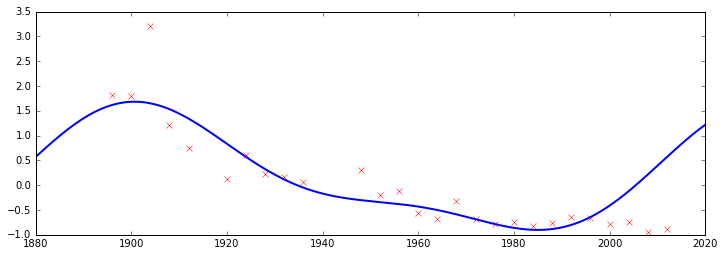

In [87]:
#x[:, 0] = np.linspace(1888, 2020, 1000)
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(x, y, 'rx')
pods.notebook.display_prediction(basis=dict(radial=radial, polynomial=polynomial, fourier=fourier), 
                                 data_limits=(1888, 2020),
                                 fig=fig, ax=ax,
                                 offset=0.,
                                 wlim = (-4., 4., 0.001),
                                 num_basis=4)

### Assignment Question 3

Use the tool provided above to try and find the best fit you can to the data. Explore the parameter space and give the weight values you used for the 

(a) polynomial basis
(b) RBF basis
(c) Fourier basis

Write your answers in the code box below creating a new vector of parameters (in the correct order!) for each basis.

*7.5 marks*

In [89]:
# Question 3 Answer Code
# provide the answers so that the code runs correctly otherwise you will loose marks!

# (a) polynomial
###### Edit these lines #####
w_0 = -0.587
w_1 = - 0.367
w_2 = 1.361
w_3 = - 0.994
##############################
w_polynomial = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (b) rbf
###### Edit these lines #####
w_0 = 2.183
w_1 = - 0.224
w_2 = - 0.398
w_3 = - 0.876
##############################
w_rbf = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

# (c) fourier
###### Edit these lines #####
w_0 = 0.183
w_1 = 0.473
w_2 = - 1.043
w_3 = - 0.398
##############################
w_fourier = np.asarray([[w_0], [w_1], [w_2], [w_3]]) 

In [90]:
np.asarray([[1, 2, 3, 4]]).shape

(1, 4)

We like to make use of *design* matrices for our data. Design matrices, as you will recall, involve placing the data points into rows of the matrix and data features into the columns of the matrix. By convention, we are referincing a vector with a bold lower case letter, and a matrix with a bold upper case letter. The design matrix is therefore given by
$$
\boldsymbol{\Phi} = \begin{bmatrix} 1 & \mathbf{x} & \mathbf{x}^2\end{bmatrix}
$$


### Non-linear but Linear in the Parameters

One rather nice aspect of our model is that whilst it is non-linear in the inputs, it is still linear in the parameters $\mathbf{w}$. This means that our derivations from before continue to operate to allow us to work with this model. In fact, although this is a non-linear regression it is still known as a *linear model* because it is linear in the parameters, 
$$
f(\mathbf{x}) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x})
$$
where the vector $\mathbf{x}$ appears inside the basis functions, making our result, $f(\mathbf{x})$ non-linear in the inputs, but $\mathbf{w}$ appears outside our basis function, making our result *linear* in the parameters. In practice, our basis function itself may contain its own set of parameters,
$$
f(\mathbf{x}) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}; \boldsymbol{\theta}),
$$
that we've denoted here as $\boldsymbol{\theta}$. If these parameters appear inside the basis function then our model is *non-linear* in these parameters.

### Assignment Question 4
For the following prediction functions state whether the model is linear in the inputs, the parameters or both.

(a) $f(x) = w_1x_1 + w_2$

(b) $f(x) = w_1\exp(x_1) + w_2x_2 + w_3$

(c) $f(x) = \log(x_1^{w_1}) + w_2x_2^2 + w_3$

(d) $f(x) = \exp(-\sum_i(x_i - w_i)^2)$

(e) $f(x) = \exp(-\mathbf{w}^\top \mathbf{x})$

*12.5 marks*

#### Question 4 Answer

Write your answer to the question in this box.

a) Linear inputs, linear parameters.

b) Non-linear inputs, linear parameters.

c) Non-linear inputs, linear parameters.

d) Non-linear inputs, non-linear parameters.

e) Non-linear inputs, non-linear parameters.

## Fitting the Model Yourself

You now have everything you need to fit a non-linear (in the inputs) basis function model to the marathon data. 

### Assignment Question 5

Choose one of the basis functions you have explored above. Compute the design matrix on the covariates (or input data), `x`. Use the design matrix and the response variable `y` to solve the following linear system for the model parameters `w`.
$$
\boldsymbol{\Phi}^\top\boldsymbol{\Phi}\mathbf{w} = \boldsymbol{\Phi}^\top \mathbf{y}
$$
Compute the corresponding error on the training data. How does it compare to the error you were able to achieve fitting the basis above? Plot the form of your prediction function from the least squares estimate alongside the form of you prediction function you fitted by hand.

*20 marks*

Error: 3.54528949984
Error hand drawn: 3.89106276219


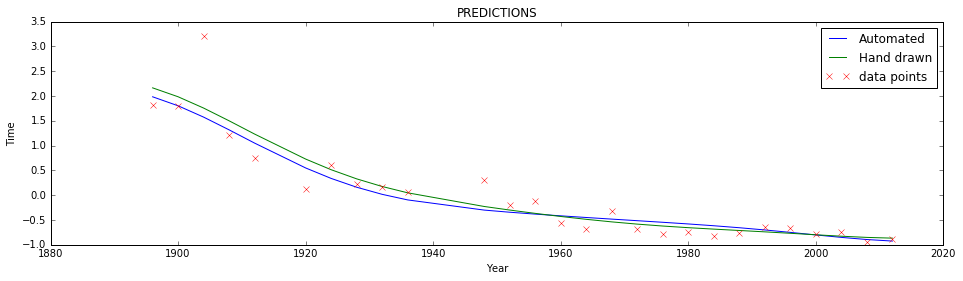

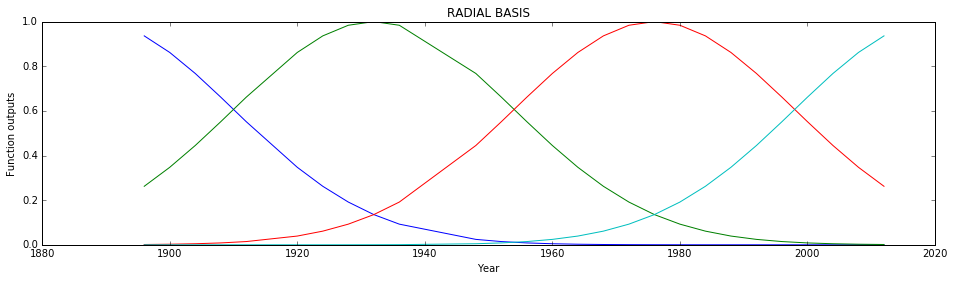

In [93]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

import numpy as np
import pylab as plt
import scipy as sp

def radial(x, num_basis=4, data_limits=[-1., 1.]):
    "Radial basis constructed using exponentiated quadratic form."
    if num_basis>1:
        centres=np.linspace(data_limits[0], data_limits[1], num_basis)
        width = (centres[1]-centres[0])/2.
    else:
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.])
        width = (data_limits[1]-data_limits[0])/2.
    
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-0.5*((x-centres[i])/width)**2)
    return Phi

w = np.zeros(4)

# calculate design matrix
function_phi = radial(x, data_limits=(1888, 2020))

Q, R = np.linalg.qr(function_phi)
w = sp.linalg.solve(R, np.dot(Q.T, y))

function = np.dot(function_phi, w)
    
error = ((y - function)**2).sum() 
  
hand_drawn_function = radial(x, data_limits=(1888, 2020)) 
fun = np.dot(hand_drawn_function, w_rbf)
error_hand_drawn = ((y - fun)**2).sum() 


#Plot graphs
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x, fun, label="Automated")
ax.plot(x, function, label="Hand drawn")
ax.plot(x, y, "rx", label = "data points")
ax.legend(loc="upper right")
plt.title("PREDICTIONS")
plt.ylabel("Time")
plt.xlabel("Year")

fig_, ax_ = plt.subplots(figsize=(16,4))
ax_.plot(x, function_phi)
plt.title("RADIAL BASIS")
plt.ylabel("Function outputs")
plt.xlabel("Year")

print("Error:",error)
print("Error hand drawn:", error_hand_drawn)



## Lecture on Basis Functions from GPRS Uganda

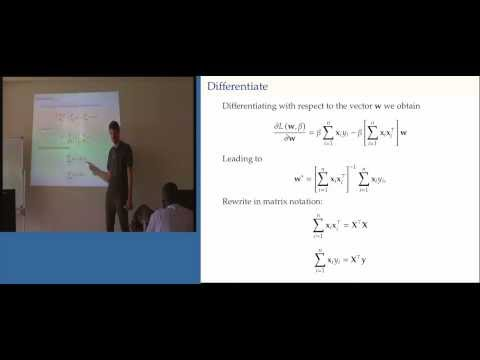

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('PoNbOnUnOao')